<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [7]:
from google.colab import files
uploaded = files.upload()

Saving DMV_Written_Tests.csv to DMV_Written_Tests.csv


In [9]:
df = pd.read_csv("DMV_Written_Tests.csv")
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [10]:
df.info()

print(df.describe())

print(df['Results'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
Results
1    60
0    40
Name: count, dtype: int64


### Task 3: Visualize the Data
---

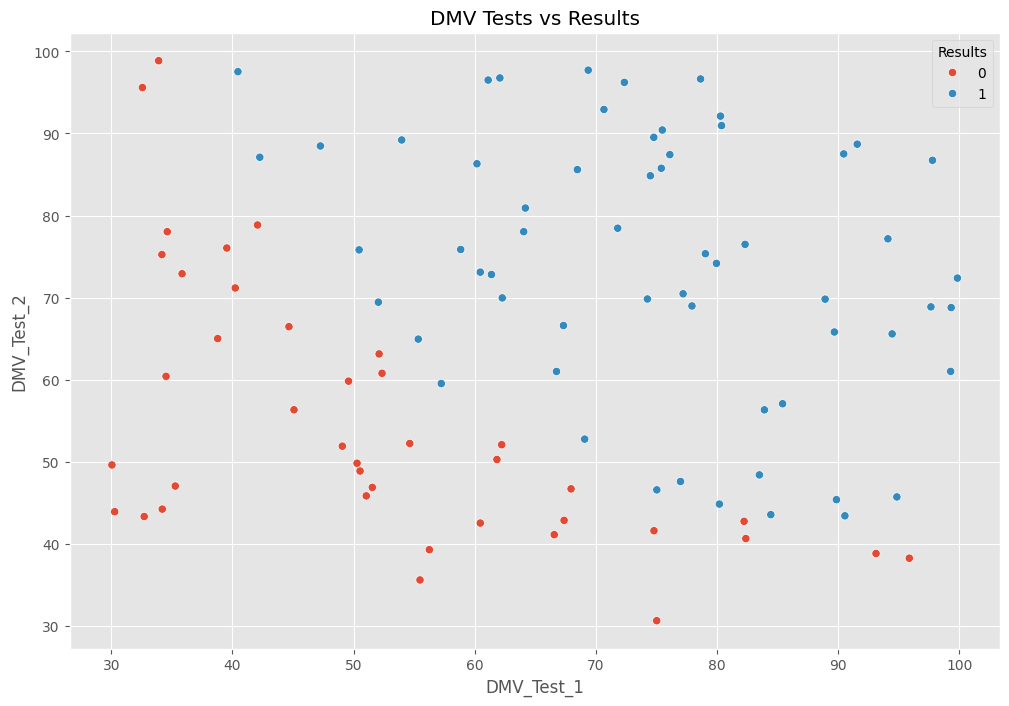

In [11]:
sns.scatterplot(x="DMV_Test_1", y="DMV_Test_2", hue="Results", data=df)
plt.title("DMV Tests vs Results")
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [14]:
print(sigmoid(0))
print(sigmoid(2))
print(sigmoid(-2))

0.5
0.8807970779778823
0.11920292202211755


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [25]:
def compute_cost_and_gradient(theta, X, y):
    m = len(y)
    epsilon = 1e-15
    h = sigmoid(np.dot(X, theta))
    h = np.clip(h, epsilon, 1 - epsilon)
    cost = -(1/m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
    gradient = (1/m) * np.dot(X.T, (h - y))
    return cost, gradient

X = df[['DMV_Test_1', 'DMV_Test_2']].values
y = df['Results'].values

### Task 6: Cost and Gradient at Initialization
---

In [26]:
theta_test = np.zeros(X.shape[1])
cost, grad = compute_cost_and_gradient(theta_test, X, y)

In [27]:
print("Initial Cost:", cost)
print("Initial Gradient:", grad)

Initial Cost: 0.6931471805599453
Initial Gradient: [-12.00921659 -11.26284221]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [30]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        cost, grad = compute_cost_and_gradient(theta, X, y)
        theta = theta - alpha * grad
        J_history.append(cost)

    return theta, J_history

In [33]:
alpha = 0.01
num_iters = 1000
theta_gd, J_history = gradient_descent(X, y, theta_test, alpha, num_iters)

In [34]:
print("Optimized theta:", theta_gd)
print("Final cost:", J_history[-1])

Optimized theta: [ 0.35266283 -0.11611885]
Final cost: 12.495031004151775


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

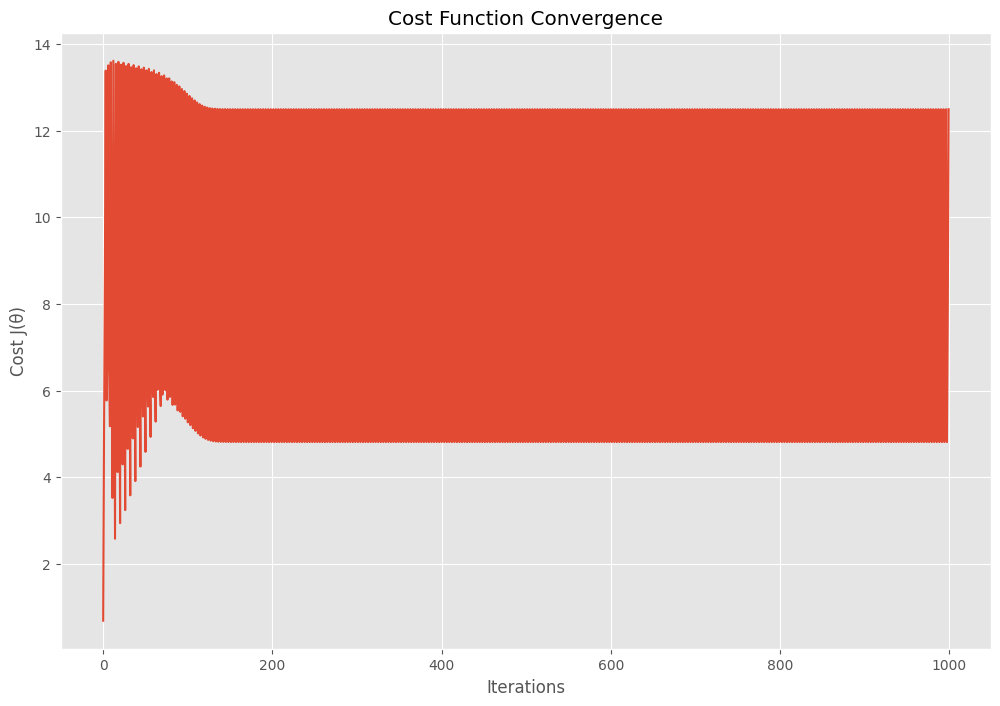

In [38]:
plt.plot(J_history)
plt.xlabel("Iterations")
plt.ylabel("Cost J(θ)")
plt.title("Cost Function Convergence")
plt.show()

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

In [51]:
X_train = np.c_[np.ones((X.shape[0], 1)), X]
theta_init = np.zeros(X_train.shape[1])
theta_opt, cost_history = gradient_descent(X_train, y, theta_init, alpha=0.1, num_iters=1000)

def plot_decision_boundary(X, y, theta):
    plt.scatter(X[y==0][:,1], X[y==0][:,2], c="red", label="Class 0")
    plt.scatter(X[y==1][:,1], X[y==1][:,2], c="blue", label="Class 1")

    x1_vals = np.linspace(X[:,1].min(), X[:,1].max(), 100)
    x2_vals = -(theta[0] + theta[1]*x1_vals) / theta[2]

    plt.plot(x1_vals, x2_vals, c="green", label="Decision Boundary")
    plt.xlabel("Feature 1 (x1)")
    plt.ylabel("Feature 2 (x2)")
    plt.legend()
    plt.title("Logistic Regression Decision Boundary")
    plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

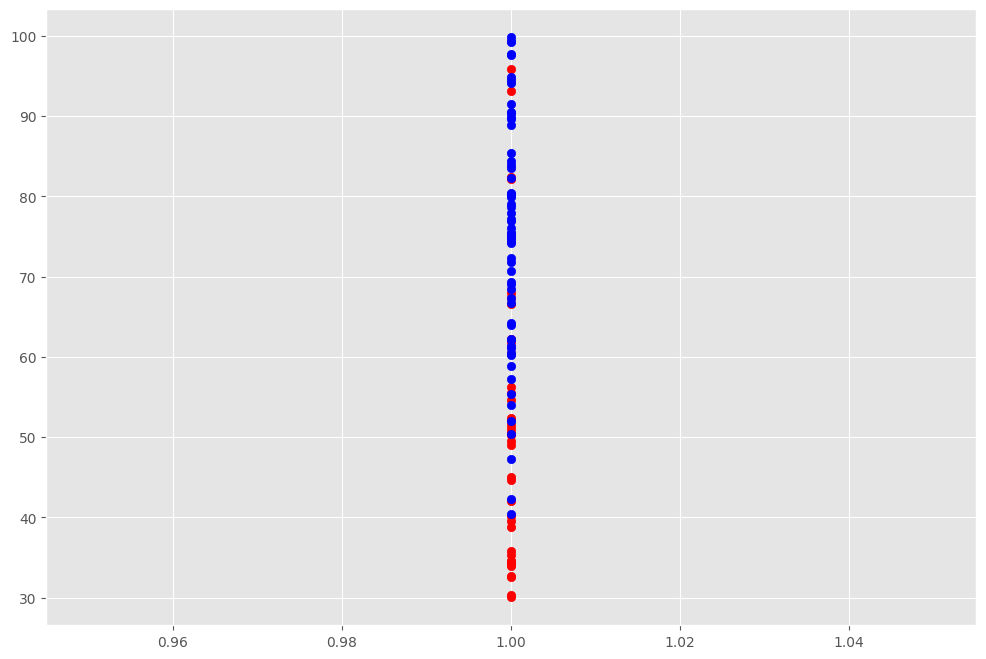

In [52]:
plot_decision_boundary(X, y, theta_test)

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$